In [1]:
import argparse
import numpy as np

from svm import weight_vector, find_support, find_slack
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [2]:
class FoursAndNines:
    """
    Class to store MNIST data
    """

    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if
        # you'd like.

        import pickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')

        train_set, valid_set, test_set = pickle.load(f)

        self.x_train = train_set[0][np.where(np.logical_or( train_set[1]==4, train_set[1] == 9))[0],:]
        self.y_train = train_set[1][np.where(np.logical_or( train_set[1]==4, train_set[1] == 9))[0]]

        shuff = np.arange(self.x_train.shape[0])
        np.random.shuffle(shuff)
        self.x_train = self.x_train[shuff,:]
        self.y_train = self.y_train[shuff]

        self.x_valid = valid_set[0][np.where(np.logical_or( valid_set[1]==4, valid_set[1] == 9))[0],:]
        self.y_valid = valid_set[1][np.where(np.logical_or( valid_set[1]==4, valid_set[1] == 9))[0]]

        self.x_test  = test_set[0][np.where(np.logical_or( test_set[1]==4, test_set[1] == 9))[0],:]
        self.y_test  = test_set[1][np.where(np.logical_or( test_set[1]==4, test_set[1] == 9))[0]]

        f.close()

In [3]:

def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1,28))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

In [4]:
#parser = argparse.ArgumentParser(description='SVM classifier options')
#parser.add_argument('--limit', type=int, default=-1,
#                    help="Restrict training to this many examples")
#args = parser.parse_args()


data = FoursAndNines("../data/mnist.pkl.gz")




# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  23.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  23.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  21.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  22.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  22.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, k

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  9.9min


[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   8.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   8.7s
[CV] C=1, kernel=linear ..............................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   8.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   9.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   9.9s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   9.5s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  10.1s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed: 61.9min finished


Best parameters set found on development set:

{'C': 1000, 'degree': 2, 'kernel': 'poly'}

Grid scores on development set:

0.961 (+/-0.013) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.937 (+/-0.009) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.011) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.983 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.969 (+/-0.012) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.005) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.010) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.966 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.961 (+/-0.006) for {'C': 10, 'kernel': 'linear'}
0.953 (+/-0.010) for {'C': 100, 'kernel': 'linear'}
0.949 (+/-0.008) for {'C': 1000, 'kernel': 'linear'}
0.949 (+/-0.013) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.526 (+/-0.007) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.507 (+/-0.000) for {'C': 1

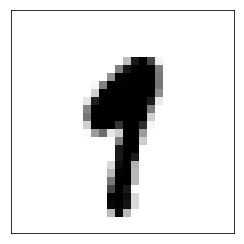

In [9]:
# TODO: Use the Sklearn implementation of support vector machines to train a classifier to
# distinguish 4's from 9's (using the MNIST data from the KNN homework).
# Use scikit-learn's Grid Search (http://scikit-learn.org/stable/modules/grid_search.html) to help determine
# optimial hyperparameters for the given model (e.g. C for linear kernel, C and p for polynomial kernel, and C and gamma for RBF).
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [1, 10, 100, 1000]}]

#scores = ['accuracy', 'precision', 'recall', 'f1']
scores = ['accuracy']



for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring=score, n_jobs=2,
                       verbose=2)
    clf.fit(data.x_train, data.y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = data.y_test, clf.predict(data.x_test)
    print ("Scoring = ",score)
    print(classification_report(y_true, y_pred))
    print()

# -----------------------------------
# Plotting Examples
# -----------------------------------

# Display in on screen
mnist_digit_show(data.x_train[ 0,:])

# Plot image to file}
#mnist_digit_show(data.x_train[1,:], "mnistfig.png")